In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

C:\Users\Nkbdr\anaconda3\envs\fastai\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 


  Using cached voila-0.3.1-py3-none-any.whl (1.7 MB)
  Using cached jupyter_server-1.13.5-py3-none-any.whl (397 kB)
  Using cached nbconvert-6.4.2-py3-none-any.whl (558 kB)
  Using cached nbclient-0.5.10-py3-none-any.whl (69 kB)
  Using cached websockets-10.1-cp37-cp37m-win_amd64.whl (97 kB)
  Using cached anyio-3.5.0-py3-none-any.whl (79 kB)
  Using cached websocket_client-1.2.3-py3-none-any.whl (53 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.2 which is incompatible.
Enabling: voila
- Writing config: C:\Users\Nkbdr\anaconda3\envs\fastai\etc\jupyter
    - Validating...
      voila 0.3.1 ok


In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f431984882dc41adbcefdceed3392ffa')

In [4]:
#search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'arara')
ims = results.attrgot('contentUrl')
len(ims)

150

In [6]:
ims = ['https://www.opopularjm.com.br/wp-content/uploads/2017/04/59958.jpg']

In [7]:
dest = 'arara azul/.jpg'
download_url(ims[0], dest)

Path('arara azul/.jpg')

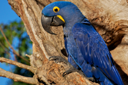

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
araras_types = 'arara azul','araracanga','arara canninde','arara vermelha','arara militar'
path = Path('/arara')

In [10]:
if not path.exists():
    path.mkdir()
    for o in araras_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} arara')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#731) [Path('/arara/arara azul/00000000.jpg'),Path('/arara/arara azul/00000001.jpeg'),Path('/arara/arara azul/00000002.jpg'),Path('/arara/arara azul/00000003.jpg'),Path('/arara/arara azul/00000004.jpg'),Path('/arara/arara azul/00000005.jpg'),Path('/arara/arara azul/00000006.jpg'),Path('/arara/arara azul/00000007.jpg'),Path('/arara/arara azul/00000009.jpg'),Path('/arara/arara azul/00000010.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#0) []

In [13]:
failed.map(Path.unlink);

In [14]:
arara = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = arara.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


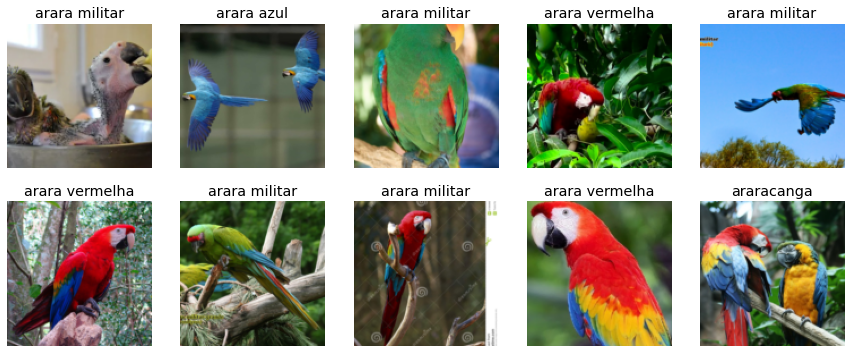

In [16]:
dls.valid.show_batch(max_n=10, nrows=2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


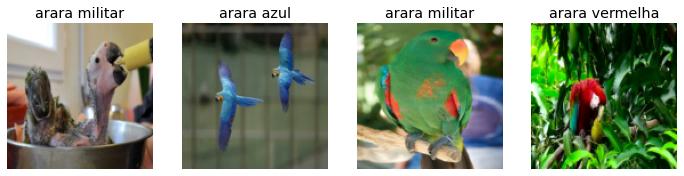

In [17]:
#arara = arara.new(item_tfms=Resize(128, ResizeMethod.Squish))
#dls = arara.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


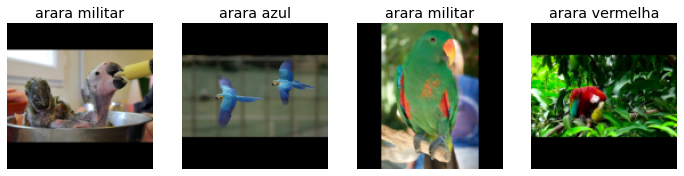

In [18]:
#arara = arara.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
#dls = arara.dataloaders(path)
#dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


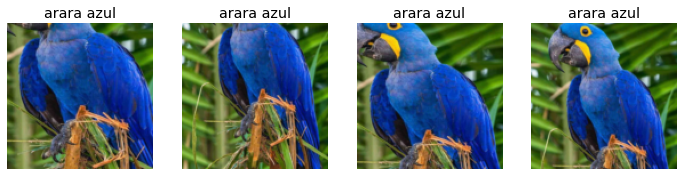

In [19]:
#arara = arara.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
#dls = arara.dataloaders(path)
#dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\Nkbdr\anaconda3\envs\fastai\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


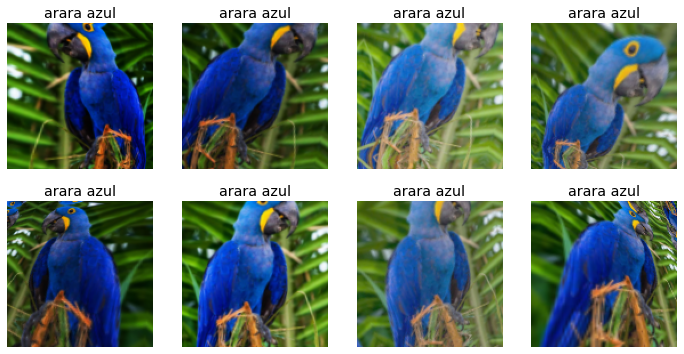

In [20]:
#arara = arara.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
#dls = arara.dataloaders(path)
#dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
arara = arara.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = arara.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.126449,1.064059,0.356164,01:10


epoch,train_loss,valid_loss,error_rate,time
0,1.163886,0.939440,0.280822,01:22
1,1.068427,1.031849,0.308219,01:38
2,0.951448,1.037371,0.301370,01:29
3,0.845069,1.025372,0.294521,01:26


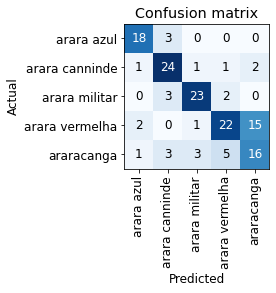

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

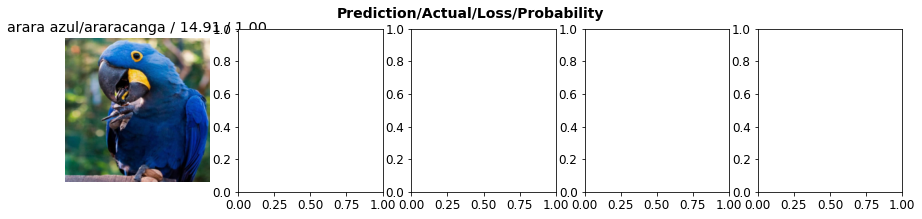

In [24]:
interp.plot_top_losses(5, nrows=1)

In [25]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [26]:
learn.export('arara.pkl')

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('arara.pkl')]

In [28]:
learn_inf = load_learner(path/'arara.pkl')

In [29]:
learn_inf.predict('arara azul/arara azul.jpg')

('arara azul',
 TensorBase(0),
 TensorBase([9.9964e-01, 3.5937e-04, 5.2576e-07, 9.1874e-07, 1.9821e-07]))

In [30]:
learn_inf.dls.vocab

['arara azul', 'arara canninde', 'arara militar', 'arara vermelha', 'araracanga']

In [31]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [32]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['arara azul/arara azul.jpg'])

In [33]:
img = PILImage.create(btn_upload.data[-1])

In [34]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [35]:
pred,pred_idx,probs = learn_inf.predict(img)

In [36]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: arara azul; Probability: 0.9996')

In [37]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [38]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [39]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [40]:
#hide_output
VBox([widgets.Label('Selecione o passaro que gostaria de identificar!'), 
      btn_upload, btn_run, out_pl, lbl_pred])